In [177]:
# 확률적 경사하강법 기반의 알고리즘 적용 모델
# 장점 : 점진적 학습 가능 => partial_fit() : 기존 모델에 추가로 1에포크 학습 != fit() : 모델을 초기화하고 fit때림

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

df=pd.read_csv("../../data/fish.csv")

In [179]:
feature=df[df.columns[1:]]
target=df[df.columns[0]]

In [180]:
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.3, random_state=795, stratify=target)
model=make_pipeline(StandardScaler(),SGDClassifier(random_state=795, verbose=0, n_iter_no_change=1000))
model.fit(x_train, y_train)
x,y=model.score(x_train, y_train), model.score(x_test, y_test) # 트레인 성적, 테스트 성적
x,y

c:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


(0.963963963963964, 0.9791666666666666)

In [181]:
model.named_steps["sgdclassifier"].n_iter_

1000

In [182]:
# 1 epoch씩 점진적으로 학습 진행 => partial_fit()
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_std=scaler.fit_transform(x_train)
x_test_std=scaler.fit_transform(x_test)

model=SGDClassifier(loss="log_loss", alpha=0.001) # 규제를 강하게 하겠다 -> 딱 fit안되도록 하겠다, 가중치의 값을 작게 하겠다 
# 올리면 올릴수록 정확도가 낮아진다 => 과대적합을 방지하기 위해 대충 맞추가 보니 정확도가 낮아진다

In [183]:
max=0
count=0
score_list=list()
for i in range(100):
    model.partial_fit(x_train_std, y_train, y_train.unique())
    score_list.append((model.score(x_train_std, y_train), model.score(x_test_std, y_test)))
    if max < model.score(x_test_std, y_test):
        max=model.score(x_test_std, y_test)
        count+=1
    if count==10:
        break

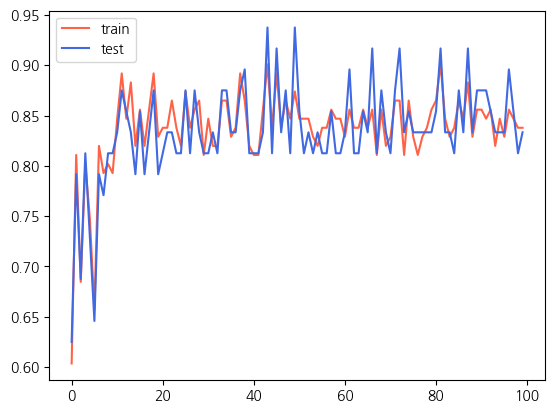

In [184]:
data=np.array(score_list).T
plt.plot(data[0], label="train", color="tomato")
plt.plot(data[1], label="test", color="royalblue")
plt.legend()
plt.show()